In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [14]:
df = pd.read_csv("heart.csv")  # Fill in the path or URL to the CSV file

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [24]:
print(df.isnull().sum()) 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [33]:
# Summary statistics for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("\n### Summary Statistics for Numerical Features ###")
print(df[numerical_columns].describe())


### Summary Statistics for Numerical Features ###
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    

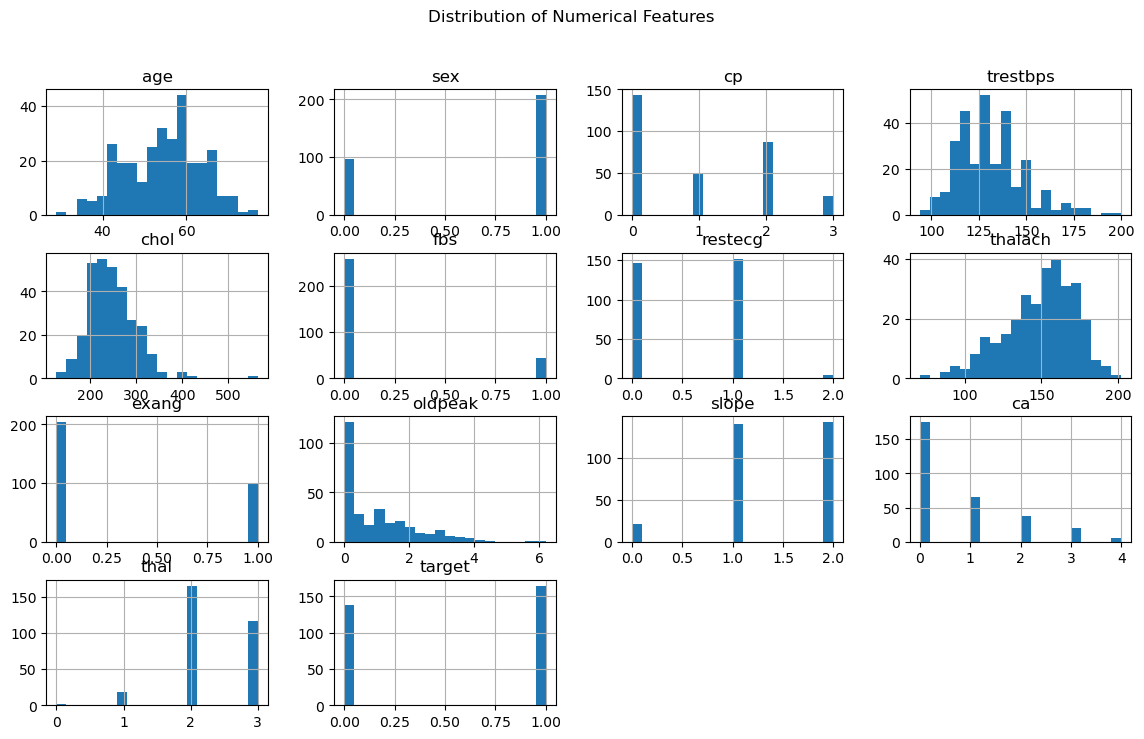

In [39]:
# Distribution of numerical features
df[numerical_columns].hist(bins=20, figsize=(14, 8))
plt.suptitle("Distribution of Numerical Features")
plt.show()

In [45]:
# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)  # Replace '<EMPTY>' with the correct target column name
y = df['target']  # Replace '<EMPTY>' with the correct target column name

In [54]:
from sklearn.model_selection import train_test_split

In [57]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [70]:
def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

In [74]:
# Dictionary to store results
results = {}

In [112]:
# In[12]:


# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\nLogistic Regression Metrics:")
evaluate_model(y_test, y_pred_log)

results['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_log),
    'classification_report': classification_report(y_test, y_pred_log, output_dict=True),
}


# In[13]:


Logistic Regression Metrics:
Accuracy: 0.8852459016393442
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
# K-Nearest Neighbors (K-NN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("\nK-Nearest Neighbors Metrics:")
evaluate_model(y_test, y_pred_knn)

results['K-Nearest Neighbors'] = {
    'accuracy': accuracy_score(y_test, y_pred_knn),
    'classification_report': classification_report(y_test, y_pred_knn, output_dict=True),
}


K-Nearest Neighbors Metrics:
Accuracy: 0.6885245901639344
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [84]:
print("\nLogistic Regression Metrics:")
evaluate_model(y_test, y_pred_log)


Logistic Regression Metrics:
Accuracy: 0.8852459016393442
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [126]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\nSupport Vector Machine Metrics:")
evaluate_model(y_test, y_pred_svm)

results['Support Vector Machine'] = {
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'classification_report': classification_report(y_test, y_pred_svm, output_dict=True),
}


Support Vector Machine Metrics:
Accuracy: 0.8688524590163934
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [135]:
# Kernel SVM
kernel_svm_model = SVC(kernel='rbf', random_state=42)
kernel_svm_model.fit(X_train, y_train)
y_pred_kernel_svm = kernel_svm_model.predict(X_test)

print("\nKernel SVM Metrics:")
evaluate_model(y_test, y_pred_kernel_svm)

results['Kernel SVM'] = {
    'accuracy': accuracy_score(y_test, y_pred_kernel_svm),
    'classification_report': classification_report(y_test, y_pred_kernel_svm, output_dict=True),
}


Kernel SVM Metrics:
Accuracy: 0.7049180327868853
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



In [139]:
# In[16]:


# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("\nNaive Bayes Metrics:")
evaluate_model(y_test, y_pred_nb)

results['Naive Bayes'] = {
    'accuracy': accuracy_score(y_test, y_pred_nb),
    'classification_report': classification_report(y_test, y_pred_nb, output_dict=True),
}


Naive Bayes Metrics:
Accuracy: 0.8688524590163934
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [145]:
# In[17]:


# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Metrics:")
evaluate_model(y_test, y_pred_dt)

results['Decision Tree'] = {
    'accuracy': accuracy_score(y_test, y_pred_dt),
    'classification_report': classification_report(y_test, y_pred_dt, output_dict=True),
}


Decision Tree Metrics:
Accuracy: 0.7540983606557377
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



In [149]:
# In[18]:


# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Metrics:")
evaluate_model(y_test, y_pred_rf)

results['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'classification_report': classification_report(y_test, y_pred_rf, output_dict=True),
}


Random Forest Metrics:
Accuracy: 0.8360655737704918
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [153]:
# In[19]:


# Compare all models
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\nComparison of Model Performance:")
# print(results_df)
results_df


Comparison of Model Performance:


,accuracy,classification_report
Logistic Regression,0.885246,"{'0': {'precision': 0.8928571428571429, 'recal..."
K-Nearest Neighbors,0.688525,"{'0': {'precision': 0.6923076923076923, 'recal..."
Support Vector Machine,0.868852,"{'0': {'precision': 0.8620689655172413, 'recal..."
Kernel SVM,0.704918,"{'0': {'precision': 0.7894736842105263, 'recal..."
Naive Bayes,0.868852,"{'0': {'precision': 0.8387096774193549, 'recal..."
Decision Tree,0.754098,"{'0': {'precision': 0.6944444444444444, 'recal..."
Random Forest,0.836066,"{'0': {'precision': 0.8275862068965517, 'recal..."
